In [1]:
import numpy as np
import ndio.remote.neurodata as neurodata
from time import time

startTime = time()

nd = neurodata()

token = 'kasthuri2015_ramon_v4'
channel = 'synapses'
res = 3
pixel_dim = 0.024*0.024*0.030  #can get from LIMS

A newer version of ndio is available. 'pip install -U ndio' to update. Pass 'suppress_warnings=True' to the neurodata constructor to suppress this message.


In [2]:
'''
There were 1,700 synapses at a density of one synapse per 1.13 μm3.

'''

import ndio.ramon as ramon

synapse_ids = nd.get_ramon_ids(token, channel, ramon_type=ramon.RAMONSynapse)

# A priori known bounds for cylinders.  Alternatively we could sweep over entire volume - this is more efficient.
# TODO:  assume that all synapses are inside cylinders, which we know to be true - should do with manual masking or a 
# RAMONId predicate query

xbox = [694,1794]; 
ybox = [1750, 2460];
zbox = [1004, 1379];


In [3]:
# synapses in 3 cylinder 
syn_vol = nd.get_cutout(token, channel, xbox[0], xbox[1], ybox[0], ybox[1], zbox[0], zbox[1], resolution = res)

In [4]:
neuron_vol = nd.get_cutout(token, 'neurons', xbox[0], xbox[1], ybox[0], ybox[1], zbox[0], zbox[1], resolution = res)

In [5]:
im_vol = nd.get_cutout('kasthuri11cc', 'image', xbox[0], xbox[1], ybox[0], ybox[1], zbox[0], zbox[1], resolution = res)

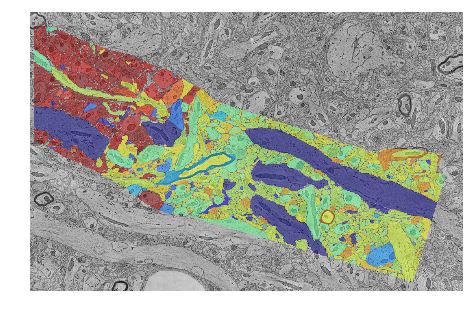

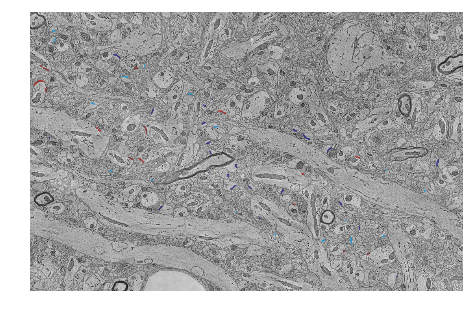

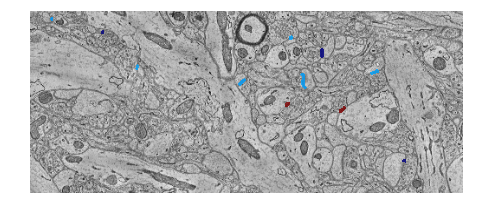

In [6]:
import ndparse as ndp
%matplotlib inline

ndp.plot(im_vol, neuron_vol, slice = 100, alpha = 0.5)
ndp.plot(im_vol, syn_vol, slice = 100, alpha = 0.5)
ndp.plot(im_vol[500:1000,500:1000,:], syn_vol[500:1000,500:1000,:], slice = 100, alpha = 0.8)

In [23]:
from time import time

start = time()
synMtx = []
for id in synapse_ids:
    print str(id).zfill(4),
    id_all = (neuron_vol[syn_vol == id])
    uid = np.unique(id_all)
    uid = uid[uid > 0]
    
    count = []
    prob = []
    nVoxels = len(id_all[id_all > 0])
    for u in uid:
        temp = id_all[u == id_all]
        id_info = nd.get_ramon(token, 'neurons', int(u))
        #synapse, total count, prob, neuron_id, neuron_type (axon, dendrite), 
        synMtx.append([id, nVoxels, 1.0*len(temp)/nVoxels, id_info.neuron, id_info.segmentclass])
print time()-start

0001 0002 0003 0004 0005 0006 0007 0008 0009 0010 0011 0012 0013 0014 0015 0016 0017 0018 0019 0020 0021 0022 0023 0024 0025 0026 0027 0028 0029 0030 0031 0032 0033

/Users/graywr1/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in greater
/Users/graywr1/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in greater


 0034 0035 0036 0037 0038 0039 0040 0041 0042 0043 0044 0045 0046 0047 0048 0049 0050 0051 0052 0053 0054 0055 0056 0057 0058 0059 0060 0061 0062 0063 0064 0065 0066 0067 0068 0069 0070 0071 0072 0073 0074 0075 0076 0077 0078 0079 0080 0081 0082 0083 0084 0085 0086 0087 0088 0089 0090 0091 0092 0093 0094 0095 0096 0097 0098 0099 0100 0101 0102 0103 0104 0105 0106 0107 0108 0109 0110 0111 0112 0113 0114 0115 0116 0117 0118 0119 0120 0121 0122 0123 0124 0125 0126 0127 0128 0129 0130 0131 0132 0133 0134 0135 0136 0137 0138 0139 0140 0141 0142 0143 0144 0145 0146 0147 0148 0149 0150 0151 0152 0153 0154 0155 0156 0157 0158 0159 0160 0161 0162 0163 0164 0165 0166 0167 0168 0169 0170 0171 0172 0173 0174 0175 0176 0177 0178 0179 0180 0181 0182 0183 0184 0185 0186 0187 0188 0189 0190 0191 0192 0193 0194 0195 0196 0197 0198 0199 0200 0201 0202 0203 0204 0205 0206 0207 0208 0209 0210 0211 0212 0213 0214 0215 0216 0217 0218 0219 0220 0221 0222 0223 0224 0225 0226 0227 0228 0229 0230 0231 0232 0233

In [26]:
# sample code

if True:
    id = 33
    id_all = (neuron_vol[syn_vol == id])
    uid = np.unique(id_all)
    uid = uid[uid > 0]

    count = []
    prob = []
    nVoxels = len(id_all[id_all > 0])
    for u in uid:
        print u
        temp = id_all[u == id_all]
        count.append(len(temp))
        prob.append(1.0*len(temp)/nVoxels)

        print count
        print prob
        print sum(prob)

        id_info = nd.get_ramon(token, 'neurons', int(u))
        #vars(id_info)
        print id_info.neuron
        print id_info.segmentclass

/Users/graywr1/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in greater
/Users/graywr1/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in greater


1258.0
[826]
[0.5573549257759784]
0.557354925776
10017
2
4345.0
[826, 14]
[0.5573549257759784, 0.009446693657219974]
0.566801619433
14345
0
5809.0
[826, 14, 642]
[0.5573549257759784, 0.009446693657219974, 0.4331983805668016]
1.0
15809
1


In [30]:
id_all = (neuron_vol[syn_vol == id])
print id_all

[ 4345.     0.     0. ...,  1258.  1258.  1258.]


In [31]:
nVoxels = len(id_all[id_all > 0])
np.unique(id_all)

/Users/graywr1/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


array([    0.,  1258.,  4345.,  5809.,    nan,    nan,    nan,    nan,
          nan,    nan,    nan,    nan])

In [34]:
vars(nd.get_ramon(token,'synapses',33))

{'author': u'unspecified',
 'confidence': 1.0,
 'cutout': None,
 'id': u'33',
 'kvpairs': {u'axonSynapseType': u'unknown',
  u'centroidx_um': u'24',
  u'centroidy_um': u'48.17',
  u'centroidz_um': u'32.85',
  u'multiSynapseBouton': u'unknown',
  u'postsynaptic': u'1258',
  u'presynaptic': u'5809',
  u'psdSize': u'1773',
  u'synapseLocation': u'spine',
  u'vesicleCount': u'unknown'},
 'resolution': 0,
 'segments': [[1258, 2], [5809, 1]],
 'status': 0,
 'synapse_type': 0,
 'voxels': None,
 'weight': 0.0,
 'xyz_offset': (0, 0, 0)}

In [35]:
zz = np.unique(neuron_vol)

In [38]:
sum(np.isnan(zz))

485407

In [42]:
np.shape(np.where(np.isnan(neuron_vol)))

(3, 485407)

In [43]:
print np.shape(neuron_vol)[0]*np.shape(neuron_vol)[1]*np.shape(neuron_vol)[2]

292875000


In [44]:
1.0*485407/292875000

0.0016573862569355528

In [45]:
synMtx

[[1, 1059, 0.4966949952785647, 10017, 2],
 [1, 1059, 0.05760151085930123, 14262, 0],
 [1, 1059, 0.4457034938621341, 16492, 1],
 [2, 991, 0.5297679112008072, 14807, 2],
 [2, 991, 0.47023208879919276, 13837, 1],
 [3, 1118, 0.5313059033989267, 13212, 2],
 [3, 1118, 0.46869409660107336, 13723, 1],
 [4, 1105, 0.6515837104072398, 10016, 2],
 [4, 1105, 0.34841628959276016, 13832, 1],
 [5, 586, 0.0034129692832764505, 10016, 2],
 [5, 586, 0.6040955631399317, 10016, 2],
 [5, 586, 0.3924914675767918, 16236, 1],
 [6, 401, 0.428927680798005, 10017, 2],
 [6, 401, 0.571072319201995, 14194, 1],
 [7, 845, 0.463905325443787, 13187, 2],
 [7, 845, 0.5360946745562131, 13871, 1],
 [8, 292, 0.4828767123287671, 13506, 2],
 [8, 292, 0.5171232876712328, 14140, 1],
 [9, 224, 0.42857142857142855, 13192, 2],
 [9, 224, 0.5669642857142857, 14139, 1],
 [9, 224, 0.004464285714285714, 14307, 0],
 [10, 800, 0.4925, 14807, 2],
 [10, 800, 0.5075, 13837, 1],
 [11, 301, 0.006644518272425249, 13154, 2],
 [11, 301, 0.54152823

In [46]:

np.save('synMatrix_v1.npy',synMtx)

In [49]:
import csv
with open('synMatrix_v1.csv', 'wb') as csvfile:
    spamwriter = csv.writer(csvfile)

    spamwriter.writerow(['synid', 'voxelcount','prob','neuron','type'])
    for s in synMtx:
        spamwriter.writerow(s)

In [48]:
synMtx[0]

[1, 1059, 0.4966949952785647, 10017, 2]